In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy.stats import ttest_ind

1. What is the sampling method that you will use to choose the 26 articles? (6 marks)

(a) Describe the method

(b) Provide a table with details of the articles chosen (name of article, type of article and year)
and how many citations they got in the year being considered (use Google Scholar to find
out the number of citations in the particular year)

Ans: (a) I collected all the required data using python and now I am going to use the random method in numpy to select a random sample. Alteratively instead of collecting all the data I could have generated only a list of attributes which would uniquely identify each article (volume, issue, number of article in the issue) and then randomly chosen from this set and thereafter collect the data corresponding to the choices.

Here I collected all the data so that I can simulate the results obtained multiple times in order to gain some insight if any.

(b) We see that there are 301 entries of 2012 and rest are from 2013. Thus we use the random sampling method in python numpy to get our random sample of size 13 from each year.

In [15]:
data = pd.read_csv('/home/goirik/Documents/IISER/Sem 5/BIO310 BioStats/Assignment/data_cite.csv')
sample_size = 13

In [20]:
list_2012 = [i for i in range(301)]
list_2013 = [i for i in range(301, 630)]

random_2012 = np.random.choice(list_2012, sample_size)
random_2013 = np.random.choice(list_2013, sample_size)

sample_2012 = data[data["title"].isin(list(data.title[random_2012]))]
sample_2013 = data[data["title"].isin(list(data.title[random_2013]))]

sample_2012['year'] = [2012]*13
sample_2013['year'] = [2013]*13

In [22]:
sample = pd.concat([sample_2012, sample_2013], sort=False)
sample["year"] = pd.Categorical(sample.year)
sample.dtypes

Unnamed: 0          int64
vol                 int64
issue               int64
index               int64
type               object
title              object
num_citations       int64
year             category
dtype: object

2. Plot histograms to show the distribution of number of citations for the 26 articles. (5 marks)

(a) Year of publication and type of article (review or research article) should also be highlighted
in the plot

(b) Ensure that the plots follow good data plotting practices

Ans: 

<AxesSubplot:xlabel='num_citations', ylabel='Count'>

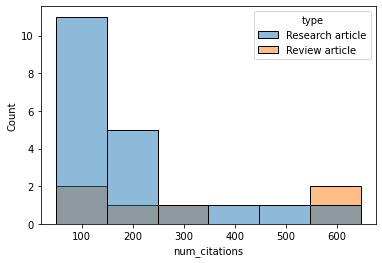

In [28]:
sns.histplot(x="num_citations", data=sample, hue="type")

<AxesSubplot:xlabel='num_citations', ylabel='Count'>

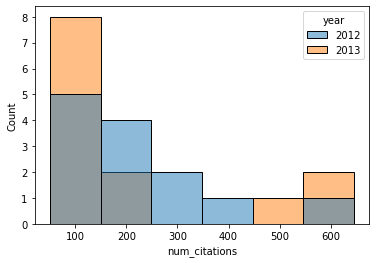

In [27]:
sns.histplot(x="num_citations", data=sample, hue="year")

3. Calculate the mean and median for the number of citations. Are these two the same? If not, comment on why they are different. (5 marks)

(a) Assuming I have a paper in this journal in 2020, how many citations would I expect to get
in 2021? Which measure should I consider from above as a measure of central tendency and
why?

In [30]:
np.mean(sample.num_citations)

224.26923076923077

In [31]:
np.median(sample.num_citations)

153.5

Ans: No, they are not the same. We should consider the median of the data because median is not affected by outlier. 

4. Do reviews and research articles get significantly different number of citations? Explain using the data and an appropriate statistical test. (If you do not have sufficient review articles in your sample, then explain what test you would use and how you would assess significance.) (3 marks)

Ans:

In [50]:
data1 = sample.num_citations[sample.type == "Review article"]
data2 = sample.num_citations[sample.type == "Research article"]

mean1, mean2 = np.mean(data1), np.mean(data2)
	
# calculate sample standard deviations
std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)

# calculate standard errors
n1, n2 = len(data1), len(data2)
se1, se2 = std1/np.sqrt(n1), std2/np.sqrt(n2)
	
# standard error on the difference between the samples
sed = np.sqrt(se1**2.0 + se2**2.0)

t_stat = (mean1 - mean2) / sed
	
# degrees of freedom
df = n1 + n2 - 2
	
# calculate the critical value
alpha = 0.05
cv = sp.stats.t.ppf(1.0 - alpha, df)

# calculate the p-value
p = (1 - sp.stats.t.cdf(abs(t_stat), df)) * 2

In [51]:
print('t=%.3f, p=%.3f' % (stat, p))

t=1.453, p=0.266


In [45]:
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

t=1.453, p=0.159


5. List two ways (no need to explain) in which you can calculate 95% Confidence Intervals (CIs)
for the mean JIF from #3 (above). Using any one of the methods, calculate the 95% CIs for
mean JIF. (4 marks)

(a) Now can you give me another answer for #3a (above)?

Ans: 

6. As mentioned at the top, real JIFs for each journal are calculated by Clarivate. Can you use one
of the methods listed in #5 to calculate 95% CIs for these JIFs? (2 marks)